In [1]:
import numpy as np
import pandas as pd
import os
import random
random.seed(1)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ModuleNotFoundError: No module named 'numpy'

In [2]:
year = '2015'
brfss_2015_dataset = pd.read_csv(f'../input/{year}.csv')

In [3]:
brfss_2015_dataset.shape

(441456, 330)

In [6]:
pd.set_option('display.max_columns', 500)
brfss_2015_dataset.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

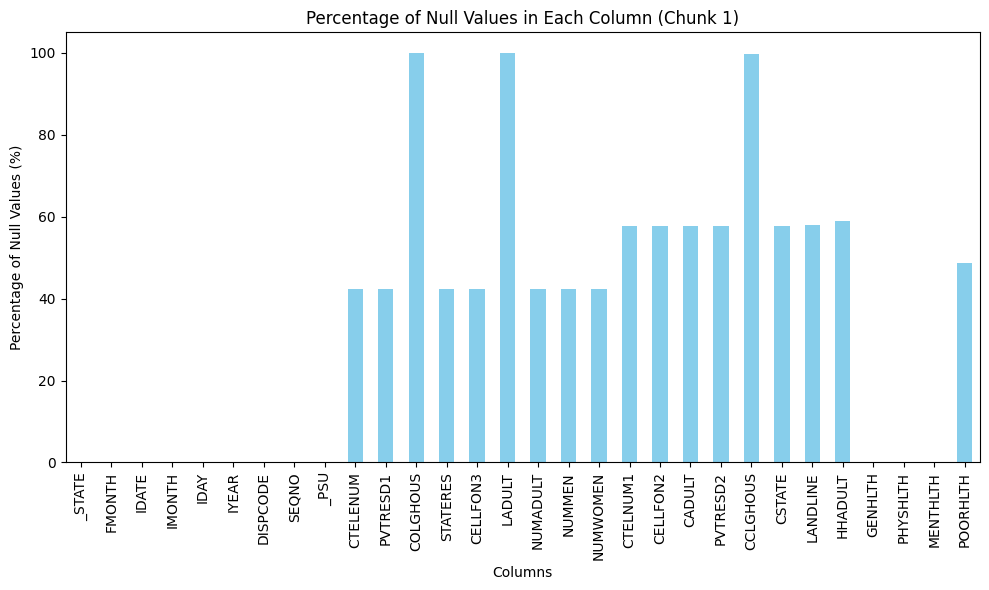

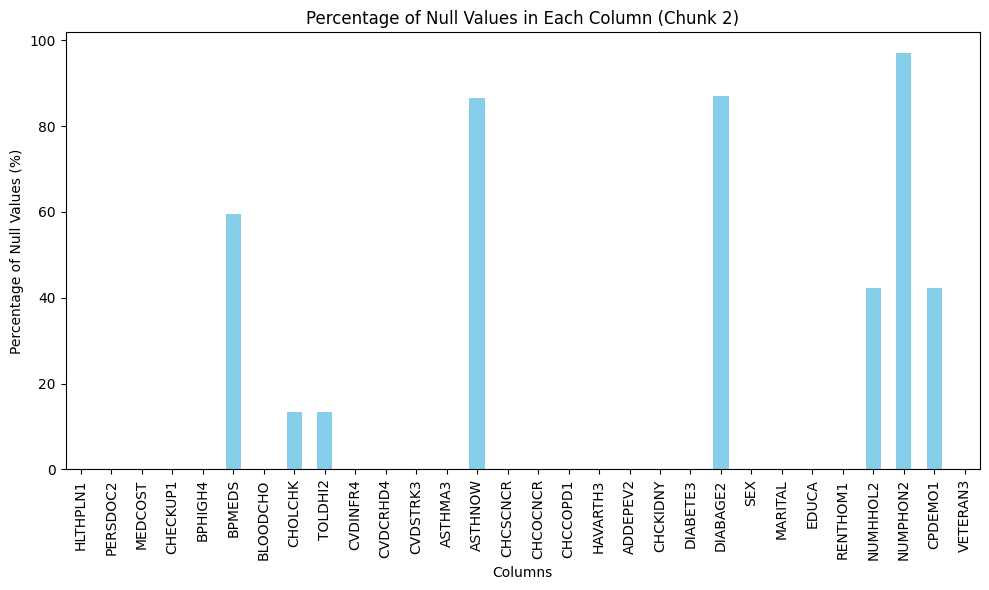

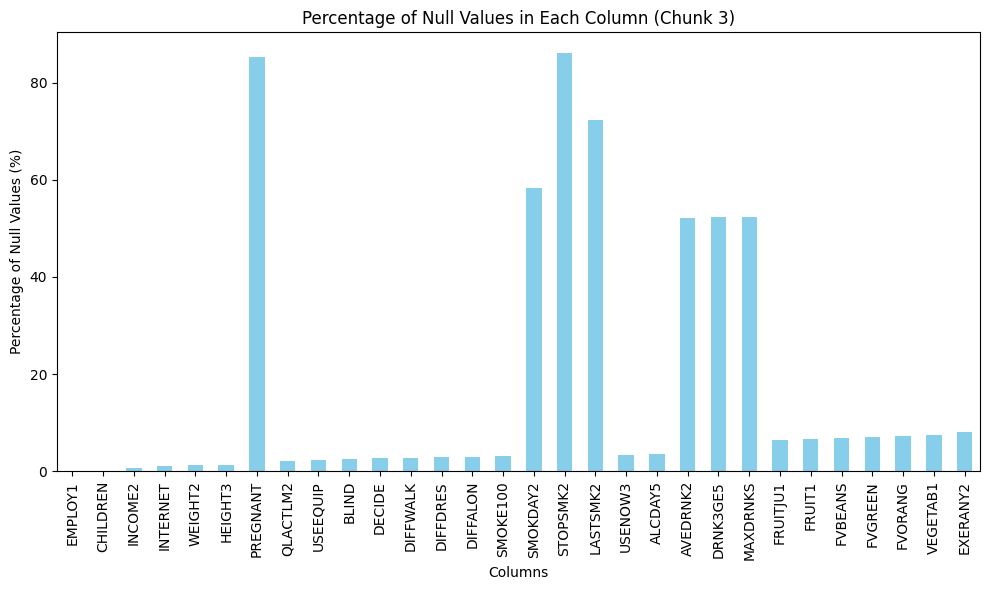

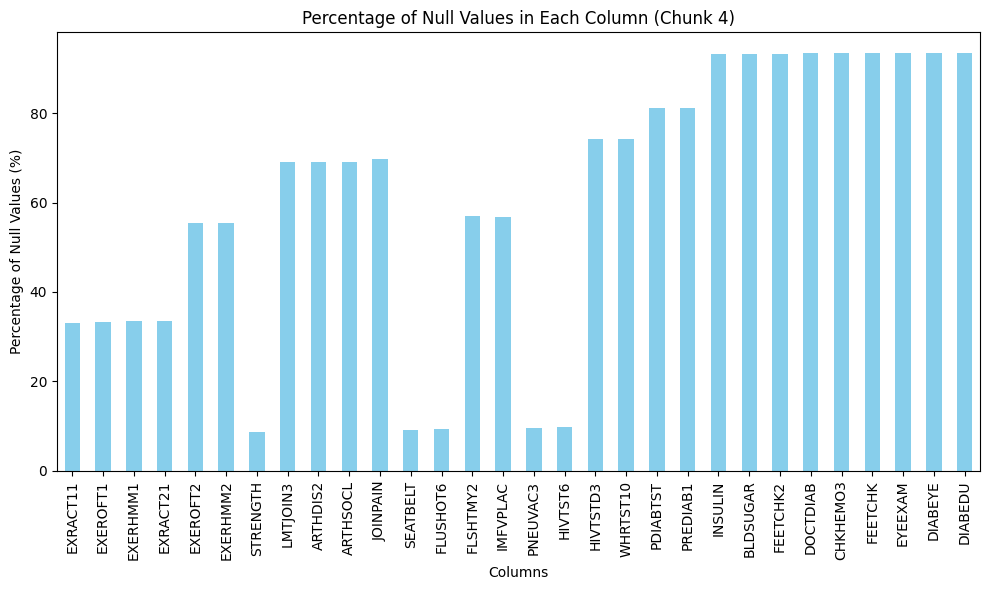

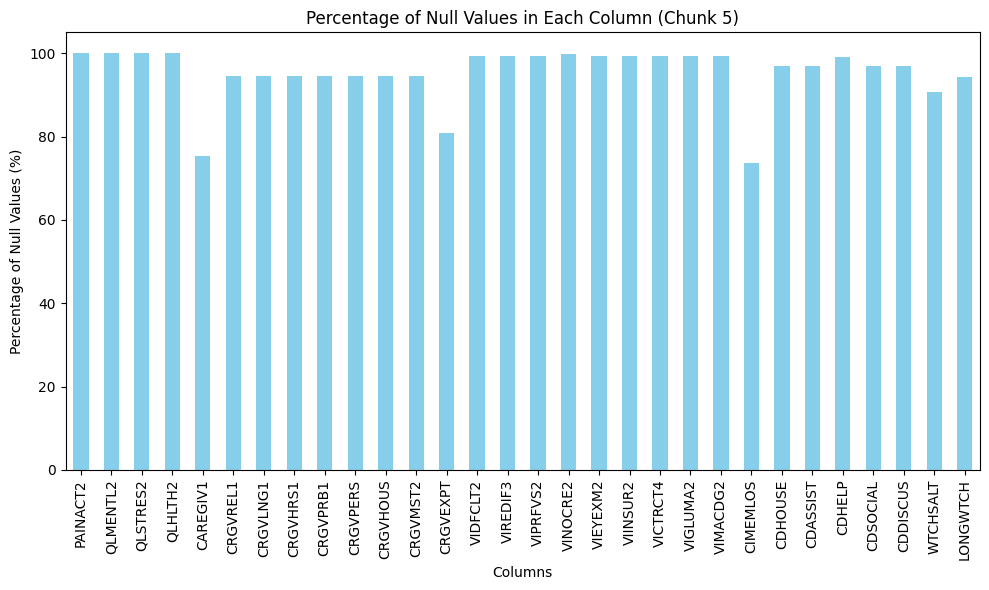

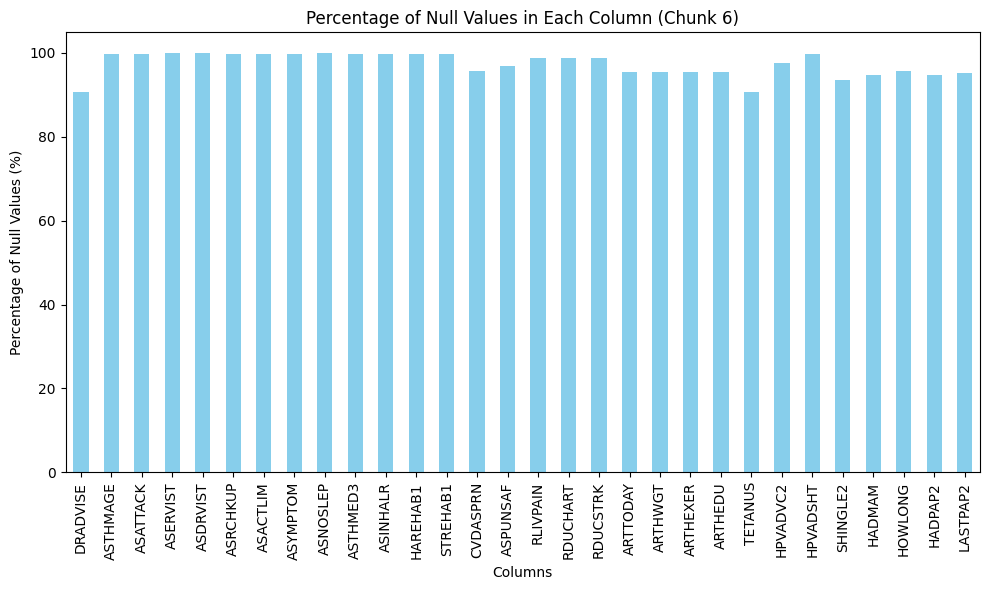

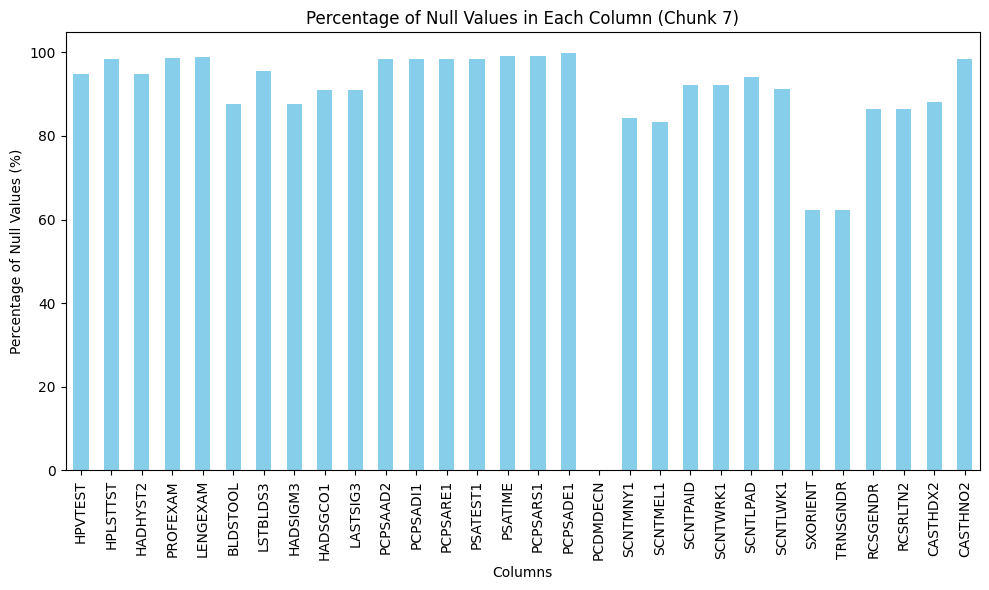

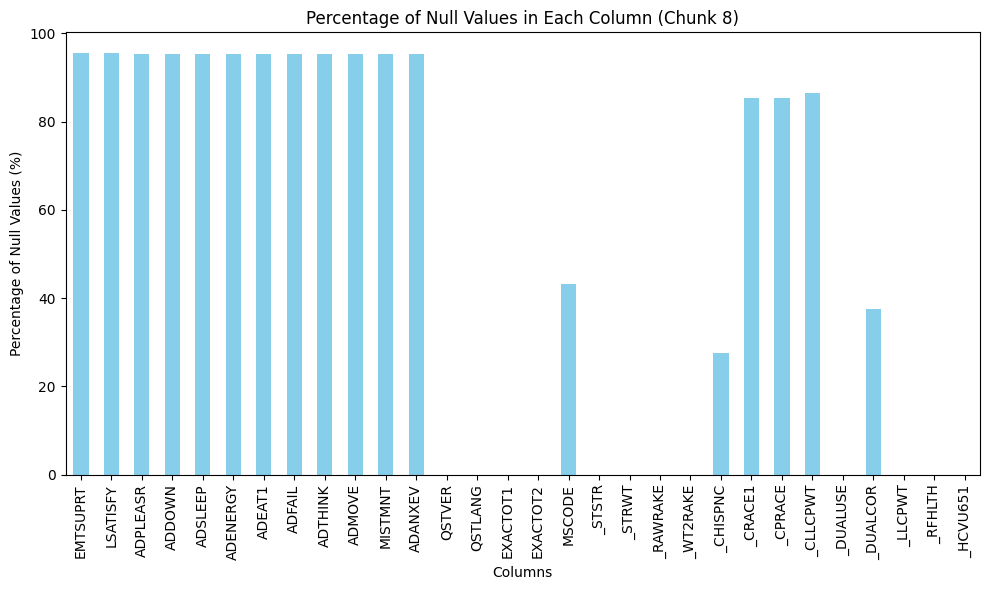

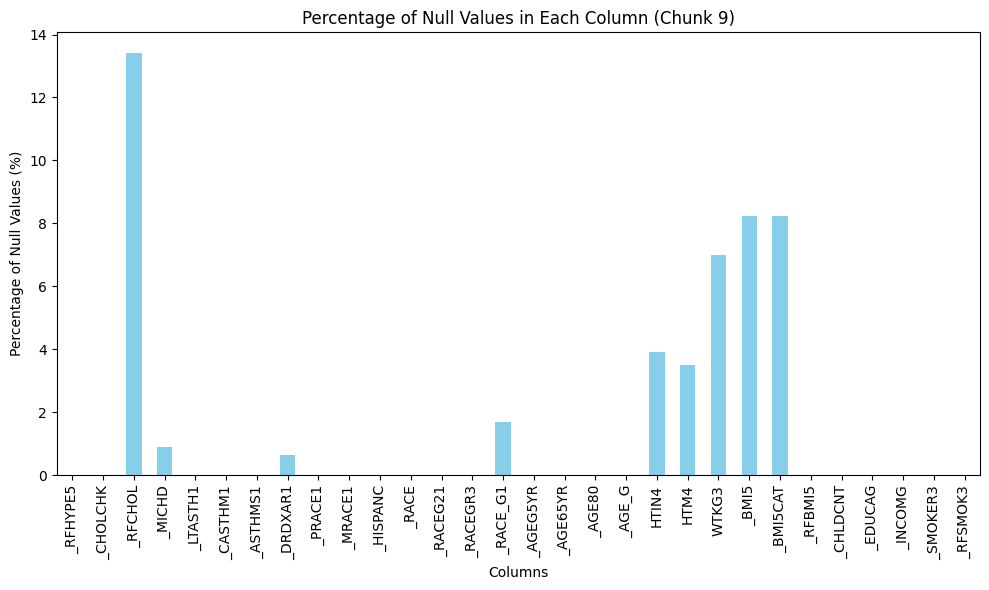

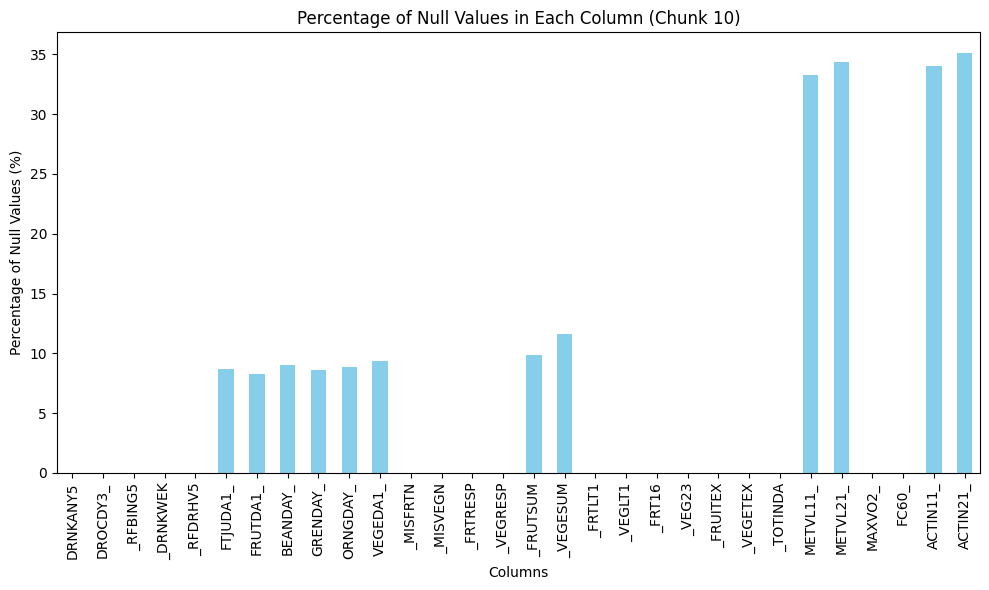

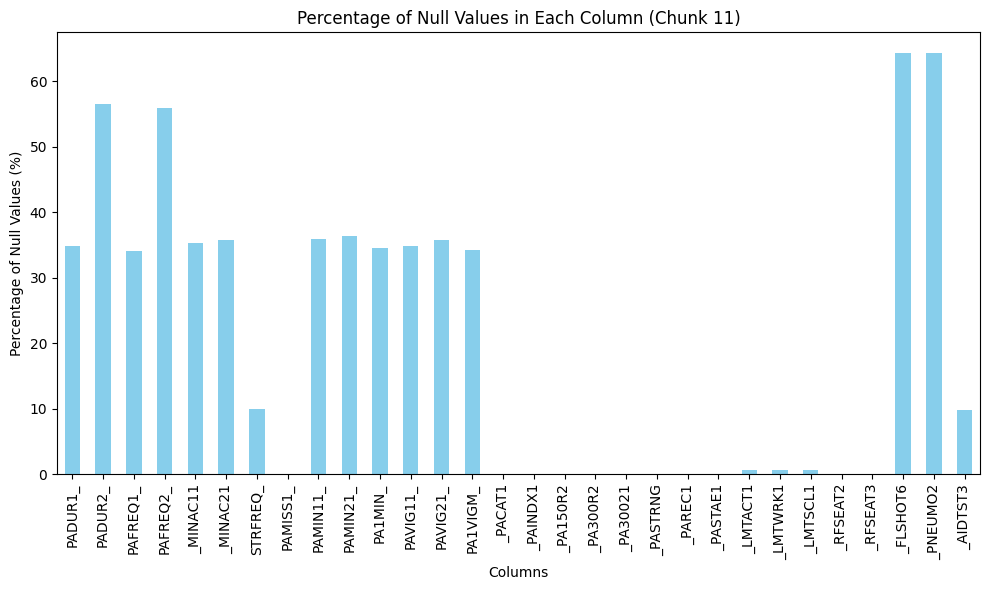

In [7]:
# Calculate null value percentages for each column
null_value_percentages = (brfss_2015_dataset.isnull().sum() / len(brfss_2015_dataset)) * 100

# Print the results in a formatted way
# print("Percentage of Null Values in Each Column:")
# for col, perc in zip(null_value_percentages.index, null_value_percentages.values):
#     print(f"{col}: {perc:.2f}%")
    
# Divide the columns into chunks
chunk_size = 30  # Number of columns per chunk
num_chunks = int(np.ceil(len(null_value_percentages) / chunk_size))

# Plotting the null value percentages in chunks
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size
    chunk = null_value_percentages[start_idx:end_idx]
    
    plt.figure(figsize=(10, 6))
    chunk.plot(kind='bar', color='skyblue')
    plt.title(f'Percentage of Null Values in Each Column (Chunk {i + 1})')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Null Values (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

In [8]:
# Filter columns with null values less than or equal to 10%
columns_to_keep = null_value_percentages[null_value_percentages <= 10].index

target_column = 'DIABETE3'
if target_column not in columns_to_keep:
        columns_to_keep.append(target_column)

# Create a new Dataset with the filtered columns
filtered_brfss_2015_dataset = brfss_2015_dataset[columns_to_keep]
filtered_brfss_2015_dataset.shape

(441456, 145)

In [9]:
# Drop the row that has missing values in the filtered_brfss_2015_dataset
filtered_brfss_2015_dataset = filtered_brfss_2015_dataset.dropna()
filtered_brfss_2015_dataset.head()
filtered_brfss_2015_dataset.shape

(340057, 145)

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming filtered_brfss_2015_dataset is your DataFrame after dropping rows with missing values
filtered_brfss_2015_dataset = filtered_brfss_2015_dataset.dropna()

# Identify categorical columns
categorical_columns = filtered_brfss_2015_dataset.select_dtypes(include=['object']).columns

# Initialize label encoder
label_encoders = {}

# Apply label encoder to each categorical column
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    filtered_brfss_2015_dataset[column] = label_encoders[column].fit_transform(filtered_brfss_2015_dataset[column])

# Display the shape of the updated DataFrame
print(filtered_brfss_2015_dataset.shape)


(340057, 145)


In [12]:
feature_variance = filtered_brfss_2015_dataset.var()
v = feature_variance.tolist()
rounded_variances = [round(v, 3) for v in v]
print(rounded_variances)

[258.528, 12.167, 12469.83, 12.176, 67.386, 0.022, 495.412, 16662125.657, 16662125.657, 1.204, 1392.703, 1315.798, 0.178, 0.625, 0.136, 1.383, 1.034, 0.735, 0.072, 0.121, 0.089, 0.183, 0.148, 0.136, 0.172, 0.224, 0.26, 0.1, 0.497, 0.246, 2.645, 1.048, 0.457, 0.14, 8.159, 1420.679, 788.739, 0.199, 71722.678, 1400.133, 0.32, 0.122, 0.098, 0.195, 0.226, 0.065, 0.125, 0.371, 0.13, 126210.627, 31879.098, 12845.253, 16054.359, 13386.8, 15318.687, 9748.029, 0.241, 135457.608, 0.594, 0.338, 2.519, 1.046, 0.003, 25.121, 0.03, 275376.111, 677046.095, 25854968422.217, 24704.705, 0.496, 27086.485, 13.909, 914494.788, 0.255, 14.262, 0.339, 2.017, 0.081, 0.269, 0.47, 0.592, 0.224, 39.432, 39.875, 0.069, 4.105, 0.165, 1.34, 0.88, 11.578, 0.237, 281.602, 2.362, 17.012, 110.368, 4674464.808, 441079.394, 0.681, 0.224, 1.098, 0.968, 4.855, 1.056, 0.385, 0.497, 5909.218, 0.818, 122871292.833, 0.83, 4471.102, 11497.201, 2076.349, 4157.467, 1819.246, 6196.963, 0.0, 0.0, 0.0, 0.0, 17698.281, 0.235, 0.163, 0.

In [13]:
# Zip variances with feature names
variances_with_names = zip(feature_variance.index.tolist(), rounded_variances)

# Sort variances in descending order based on the rounded values
sorted_variances = sorted(variances_with_names, key=lambda x: x[1], reverse=True)

# Print the sorted variances
print("Rounded Feature Variances (Descending Order):")
for feature, variance in sorted_variances:
    print(f"{feature}: {variance}")


Rounded Feature Variances (Descending Order):
_STSTR: 25854968422.217
_DRNKWEK: 122871292.833
FC60_: 45985038.924
MAXVO2_: 44471863.555
SEQNO: 16662125.657
_PSU: 16662125.657
STRFREQ_: 4972135.342
WTKG3: 4674464.808
_LLCPWT: 914494.788
EXACTOT2: 677046.095
_BMI5: 441079.394
EXACTOT1: 275376.111
STRENGTH: 135457.608
ALCDAY5: 126210.627
WEIGHT2: 71722.678
FRUITJU1: 31879.098
_WT2RAKE: 27086.485
_STRWT: 24704.705
_FRUTSUM: 17698.281
FVBEANS: 16054.359
FVORANG: 15318.687
FVGREEN: 13386.8
FRUIT1: 12845.253
IDATE: 12469.83
FRUTDA1_: 11497.201
VEGETAB1: 9748.029
VEGEDA1_: 6196.963
DROCDY3_: 5909.218
FTJUDA1_: 4471.102
GRENDAY_: 4157.467
BEANDAY_: 2076.349
ORNGDAY_: 1819.246
CHILDREN: 1420.679
HEIGHT3: 1400.133
PHYSHLTH: 1392.703
MENTHLTH: 1315.798
INCOME2: 788.739
DISPCODE: 495.412
_AGE80: 281.602
_STATE: 258.528
HTM4: 110.368
IDAY: 67.386
_MRACE1: 39.875
_PRACE1: 39.432
QSTVER: 25.121
HTIN4: 17.012
_HCVU651: 14.262
_DUALUSE: 13.909
IMONTH: 12.176
FMONTH: 12.167
_AGEG5YR: 11.578
EMPLOY1: 8.15

In [14]:
# Separate features and target variable
target_variable = "DIABETE3"
X = filtered_brfss_2015_dataset.drop(columns=[target_variable])
y = filtered_brfss_2015_dataset[target_variable]

In [15]:
# filter data according the variance
# Calculate the variance of each feature in X
feature_variances = X.var()

# Filter features with variance greater than 0.1
selected_features = feature_variances[feature_variances > 0.1].index

# Filter X to include only selected features
filtered_X = X[selected_features]

# Display the shape of the filtered X
print("Shape of filtered features (X):", filtered_X.shape)


Shape of filtered features (X): (340057, 126)


In [102]:
# from sklearn.preprocessing import StandardScaler
# # Normalize/scale the data

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(filtered_X)

# # Convert X_scaled to a DataFrame with column names
# X_scaled_df = pd.DataFrame(X_scaled, columns=filtered_X.columns)
# print(X_scaled_df.shape)

(340057, 126)


Features by correlation with target:
BPHIGH4     0.236578
_LMTSCL1    0.152805
USEEQUIP    0.149544
DIFFWALK    0.148419
HAVARTH3    0.139905
              ...   
_AGE_G     -0.177220
_BMI5CAT   -0.184558
_BMI5      -0.191409
_RFHYPE5   -0.202738
GENHLTH    -0.248304
Name: DIABETE3, Length: 126, dtype: float64
Selected Features:
Index(['BPHIGH4', '_LMTSCL1', 'USEEQUIP', 'DIFFWALK', 'HAVARTH3', '_DRDXAR1',
       '_LMTACT1', 'QLACTLM2', 'PNEUVAC3', 'INTERNET', '_AGE65YR', '_HCVU651',
       'ALCDAY5', '_RFBMI5', 'WTKG3', 'EMPLOY1', '_RFHLTH', '_AGEG5YR',
       '_AGE80', '_AGE_G', '_BMI5CAT', '_BMI5', '_RFHYPE5', 'GENHLTH'],
      dtype='object')


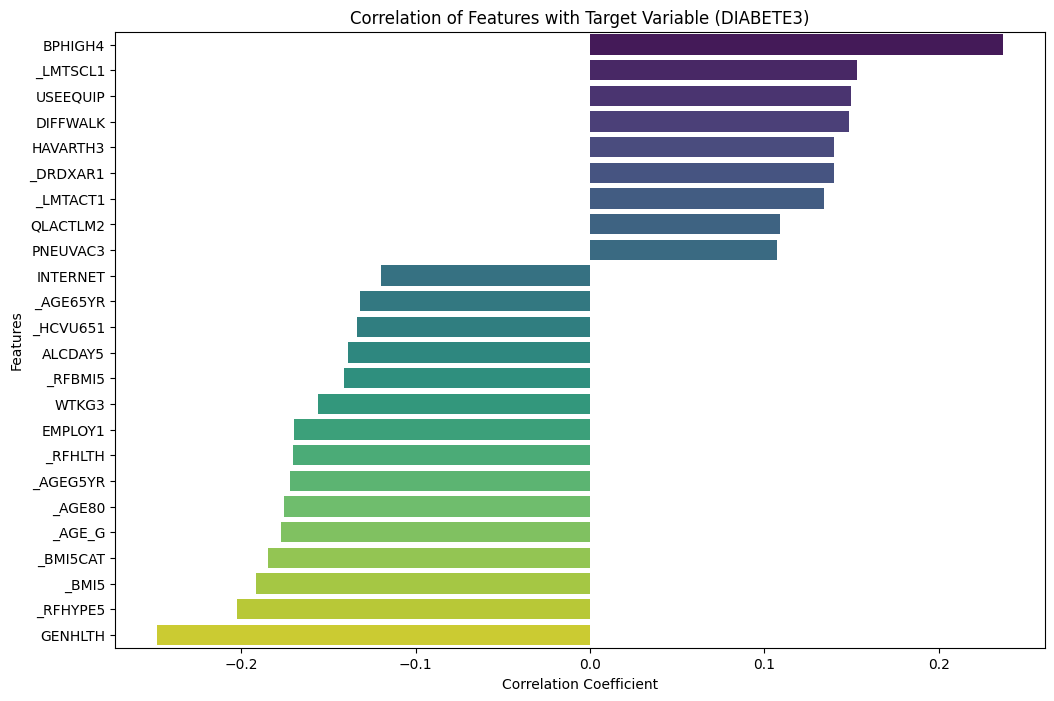

In [16]:
import seaborn as sns
#filter data by considering the correation of each feature with target vector
target = "DIABETE3"
data = pd.concat([filtered_X, y], axis=1)

data.head()

# Feature Selection: Correlation with the target variable
correlation_with_target = data.corr()[target].drop(target).sort_values(ascending=False)
print("Features by correlation with target:")
print(correlation_with_target)

# Select features based on a correlation threshold
correlation_threshold = 0.1
selected_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index
print("Selected Features:")
print(selected_features)

# Plot the correlation graph
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target[selected_features].values, y=correlation_with_target[selected_features].index, palette="viridis")
plt.title('Correlation of Features with Target Variable (DIABETE3)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [17]:
# select specific columns
filtered_brfss_df_selected = data[['BPHIGH4', '_LMTSCL1', 'USEEQUIP', 'DIFFWALK', 'HAVARTH3', '_DRDXAR1',
                                   '_LMTACT1', 'QLACTLM2', 'PNEUVAC3', 'INTERNET', '_AGE65YR', '_HCVU651',
                                   'ALCDAY5', '_RFBMI5', 'WTKG3', 'EMPLOY1', '_RFHLTH', '_AGEG5YR',
                                   '_AGE80', '_AGE_G', '_BMI5CAT', '_BMI5', '_RFHYPE5', 'GENHLTH',"DIABETE3"]]

filtered_brfss_df_selected.shape

#filtered_brfss_df_selected.columns.tolist()

(340057, 25)

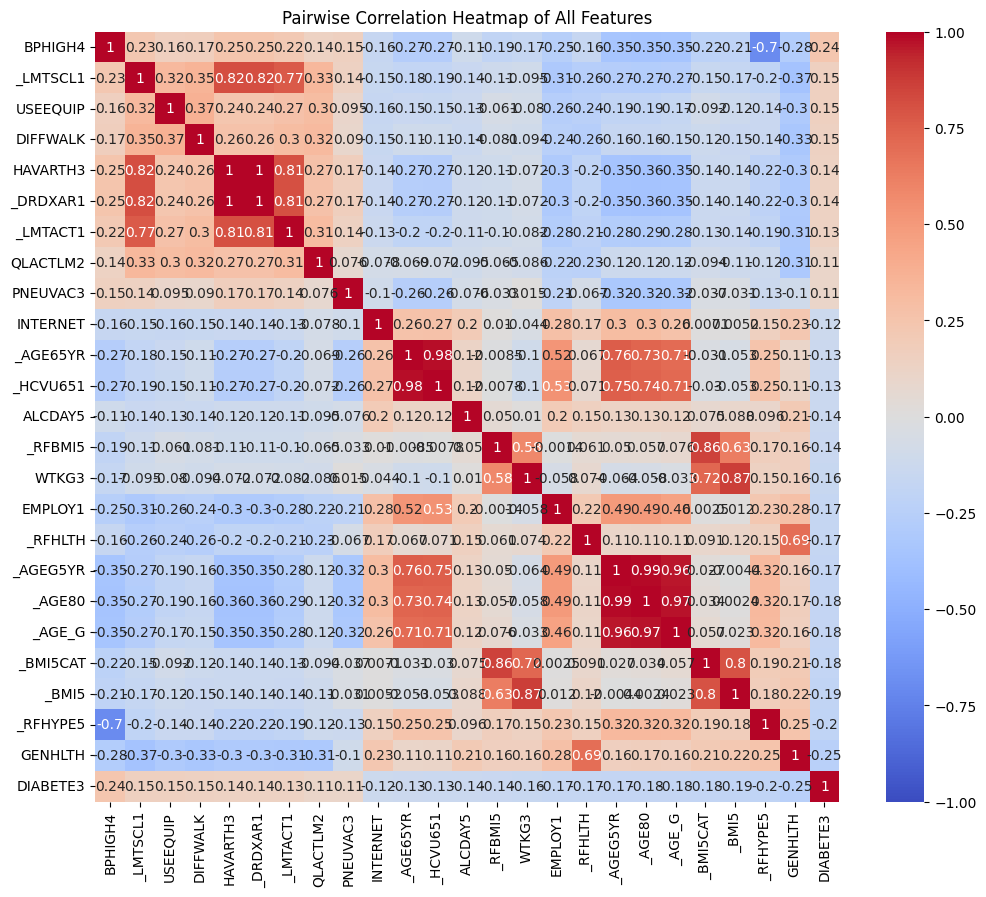

In [19]:
# see the pairwise correlatioin of the features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame with 25 features is named `data`

# Calculate the correlation matrix
correlation_matrix = filtered_brfss_df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Pairwise Correlation Heatmap of All Features')
plt.show()


According to this heat map, I elliminate redandata features that has higher correlation(>=0.99) with another feature. So, I removed _DRDXAR1, _AGEG5YR

In [21]:
# Identifying redundant features
threshold = 0.95  # You can adjust this threshold based on your criteria
redundant_pairs = set()
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iat[i, j]) > threshold:
            redundant_pairs.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Redundant feature pairs (correlation > 0.95 or < -0.95):")
print(redundant_pairs)

Redundant feature pairs (correlation > 0.95 or < -0.95):
{('_AGE65YR', '_HCVU651'), ('HAVARTH3', '_DRDXAR1'), ('_AGE80', '_AGE_G'), ('_AGEG5YR', '_AGE80'), ('_AGEG5YR', '_AGE_G')}


In [22]:
filtered_brfss_df_selected = filtered_brfss_df_selected.drop(columns=['_AGE80'])
filtered_brfss_df_selected = filtered_brfss_df_selected.drop(columns=['_AGE_G'])
filtered_brfss_df_selected = filtered_brfss_df_selected.drop(columns=['_AGE65YR'])

In [100]:
# # select specific columns
# filtered_brfss_df_selected = filtered_brfss_df_selected[['BPHIGH4', '_LMTSCL1', 'USEEQUIP', 'DIFFWALK', 'HAVARTH3', 
#                                    '_LMTACT1', 'QLACTLM2', 'PNEUVAC3', 'INTERNET', '_AGE65YR', '_HCVU651',
#                                    'ALCDAY5', '_RFBMI5', 'WTKG3', 'EMPLOY1', '_RFHLTH',
#                                    '_AGE80', '_AGE_G', '_BMI5CAT', '_BMI5', '_RFHYPE5', 'GENHLTH',"DIABETE3"]]

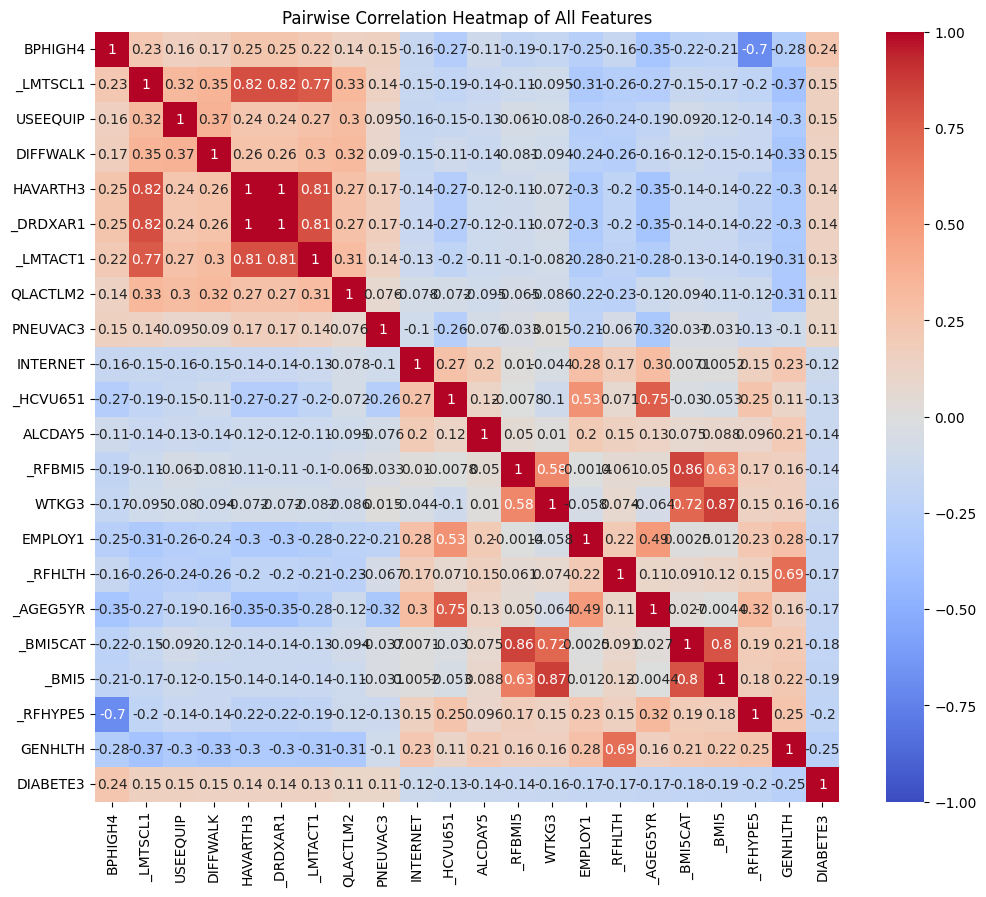

In [23]:
# Calculate the correlation matrix
correlation_matrix = filtered_brfss_df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Pairwise Correlation Heatmap of All Features')
plt.show()

In [49]:
filtered_brfss_df_selected.shape

(340057, 22)

In [50]:
filtered_brfss_df_selected.head()

,BPHIGH4,_LMTSCL1,USEEQUIP,DIFFWALK,HAVARTH3,_DRDXAR1,_LMTACT1,QLACTLM2,PNEUVAC3,INTERNET,_HCVU651,ALCDAY5,_RFBMI5,WTKG3,EMPLOY1,_RFHLTH,_AGEG5YR,_BMI5CAT,_BMI5,_RFHYPE5,GENHLTH,DIABETE3
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,888.0,2.0,12701.0,8.0,2.0,9.0,4.0,4018.0,2.0,5.0,3.0
1,3.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,888.0,2.0,7484.0,3.0,1.0,7.0,3.0,2509.0,1.0,3.0,3.0
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,888.0,2.0,8165.0,8.0,2.0,9.0,3.0,2819.0,2.0,5.0,3.0
5,1.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,9.0,888.0,2.0,6577.0,2.0,1.0,11.0,3.0,2652.0,2.0,2.0,3.0
6,1.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,9.0,203.0,1.0,6713.0,7.0,1.0,11.0,2.0,2389.0,2.0,2.0,3.0


In [24]:
# Check unique values in each column
for column in filtered_brfss_df_selected.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'BPHIGH4': [1. 3. 7. 2. 4. 9.]
Unique values in column '_LMTSCL1': [1. 4. 3. 2. 9.]
Unique values in column 'USEEQUIP': [1. 2. 7. 9.]
Unique values in column 'DIFFWALK': [1. 2. 7. 9.]
Unique values in column 'HAVARTH3': [1. 2.]
Unique values in column '_DRDXAR1': [1. 2.]
Unique values in column '_LMTACT1': [1. 3. 2. 9.]
Unique values in column 'QLACTLM2': [1. 2. 7. 9.]
Unique values in column 'PNEUVAC3': [1. 2. 7. 9.]
Unique values in column 'INTERNET': [2. 1. 7. 9.]
Unique values in column '_HCVU651': [1. 2. 9.]
Unique values in column 'ALCDAY5': [888. 203. 202. 201. 777. 215. 210. 225. 230. 101. 205. 102. 224. 206.
 103. 220. 208. 104. 204. 107. 207. 214. 105. 106. 999. 212. 223. 209.
 221. 227. 228. 216. 217. 213. 218. 229. 222. 211. 226. 219.]
Unique values in column '_RFBMI5': [2. 1.]
Unique values in column 'WTKG3': [12701.  7484.  8165.  6577.  6713.  7303.  7938.  6804.  5806.  9072.
  7031.  7394.  7711.  7802.  8618.  9525. 11793.  4944.  8709.  8255.


In [25]:
# _RFHYPE5 = HighBP
# Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
filtered_brfss_df_selected['_RFHYPE5'] = filtered_brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected._RFHYPE5 != 9]
# filtered_brfss_df_selected._RFHYPE5.unique()
# filtered_brfss_df_selected.shape

# _LMTSCL1
# 0-no, 1-arthritis and limited a lot  , 2- arthritis and limited a little
filtered_brfss_df_selected['_LMTSCL1'] = filtered_brfss_df_selected['_LMTSCL1'].replace({3: 0})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected['_LMTSCL1'] != 9]
# print(filtered_brfss_df_selected['_LMTSCL1'].unique())
# print(filtered_brfss_df_selected['_LMTSCL1'].value_counts())
# print(filtered_brfss_df_selected.shape)

# variable changed to USEEQUIP
# USEEQUIP
# 0-no 1-yes
# Health Problems Requiring Special Equipment
filtered_brfss_df_selected['USEEQUIP'] = filtered_brfss_df_selected['USEEQUIP'].replace({2:0})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected._RFHYPE5 != 9]
# print(filtered_brfss_df_selected.USEEQUIP.unique())
# filtered_brfss_df_selected.shape


# DIFFWALK
# Difficulty Walking or Climbing Stairs
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
filtered_brfss_df_selected['DIFFWALK'] = filtered_brfss_df_selected['DIFFWALK'].replace({2:0})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected.DIFFWALK != 7]
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected.DIFFWALK != 9]
# filtered_brfss_df_selected.DIFFWALK.unique()


#_HAVARTH3 Told Have Arthritis
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
filtered_brfss_df_selected['HAVARTH3'] = filtered_brfss_df_selected['HAVARTH3'].replace({2:0})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected.DIFFWALK != 7]
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected.DIFFWALK != 9]
# print(filtered_brfss_df_selected.HAVARTH3.unique())
# filtered_brfss_df_selected.shape


# _LMTACT1
# Limited usual activities
# 0-no, 1-arthritis and have limited usual activities , 2- arthritis and no limited usual activities
filtered_brfss_df_selected['_LMTACT1'] = filtered_brfss_df_selected['_LMTACT1'].replace({3: 0})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected['_LMTACT1'] != 9]
filtered_brfss_df_selected = filtered_brfss_df_selected.dropna(subset=['_LMTACT1'])
# print(filtered_brfss_df_selected['_LMTACT1'].unique())
# filtered_brfss_df_selected.shape



# QLACTLM2
# Activity Limitation Due to Health Problems
# 0-No, 1- Yes
filtered_brfss_df_selected['QLACTLM2'] = filtered_brfss_df_selected['QLACTLM2'].replace({2: 0})
filtered_brfss_df_selected = filtered_brfss_df_selected[~filtered_brfss_df_selected['QLACTLM2'].isin([7, 9])]
filtered_brfss_df_selected = filtered_brfss_df_selected.dropna(subset=['QLACTLM2'])
# print(filtered_brfss_df_selected['QLACTLM2'].unique())
# print(filtered_brfss_df_selected.shape)


# PNEUVAC3
# Pneumonia shot ever
# 0-No 1 -yes
filtered_brfss_df_selected['PNEUVAC3'] = filtered_brfss_df_selected['PNEUVAC3'].replace({2: 0})
filtered_brfss_df_selected = filtered_brfss_df_selected[~filtered_brfss_df_selected['PNEUVAC3'].isin([7, 9])]
filtered_brfss_df_selected = filtered_brfss_df_selected.dropna(subset=['PNEUVAC3'])
# print(filtered_brfss_df_selected['PNEUVAC3'].unique())
# print(filtered_brfss_df_selected.shape)


# INTERNET
# Internet use in the past 30 days?
# 0-no, 1-yes
filtered_brfss_df_selected['INTERNET'] = filtered_brfss_df_selected['INTERNET'].replace({2: 0})
filtered_brfss_df_selected = filtered_brfss_df_selected[~filtered_brfss_df_selected['INTERNET'].isin([7, 9])]
filtered_brfss_df_selected = filtered_brfss_df_selected.dropna(subset=['INTERNET'])
# print(filtered_brfss_df_selected['INTERNET'].unique())
# print(filtered_brfss_df_selected.shape)



# _HCVU651
# Respondents aged 18-64 with health care coverage
# n0-0, 1-yes

filtered_brfss_df_selected['_HCVU651'] = filtered_brfss_df_selected['_HCVU651'].replace({2: 0})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected['_HCVU651'] != 9]
# print(filtered_brfss_df_selected['_HCVU651'].unique())
# print(filtered_brfss_df_selected.shape)



# ALCDAY5
# Days in past 30 had alcoholic beverage
# Number of days

def convert_alcday5(value):
    if 101 <= value <= 199:  # Days per week
        return (value - 100) * 4.3  # Approximate conversion to days in 30 days
    elif 201 <= value <= 299:  # Days in past 30 days
        return value - 200
    elif value == 888:
        return 0
    else:
        return value

filtered_brfss_df_selected['ALCDAY5'] = filtered_brfss_df_selected['ALCDAY5'].apply(lambda x: convert_alcday5(x) if pd.notnull(x) else x)
filtered_brfss_df_selected['ALCDAY5'] = filtered_brfss_df_selected['ALCDAY5'].replace({888: 0})
filtered_brfss_df_selected = filtered_brfss_df_selected[~filtered_brfss_df_selected['ALCDAY5'].isin([777, 999])]
filtered_brfss_df_selected = filtered_brfss_df_selected.dropna(subset=['ALCDAY5'])
# print(filtered_brfss_df_selected['ALCDAY5'].unique())
# print(filtered_brfss_df_selected.shape)



# _RFBMI5
# Overweight or obese calculated variable
# 0 - no, 1- yes

filtered_brfss_df_selected['_RFBMI5'] = filtered_brfss_df_selected['_RFBMI5'].replace({1: 0, 2: 1})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected['_RFBMI5'] != 9]
# print(filtered_brfss_df_selected['_RFBMI5'].unique())
# print(filtered_brfss_df_selected.shape)



# WTKG3
# Computed Weight in Kilograms
# Function to convert weight in pounds to kilograms
def convert_weight_to_kg(weight):
    if 1 <= weight <= 650:
        return weight / 2.2046
    elif 9023 <= weight <= 9295:
        return (weight - 9000) / 2.2046
    else:
        return weight

filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected['WTKG3'] != 99999]
filtered_brfss_df_selected['WTKG3'] = filtered_brfss_df_selected['WTKG3'].apply(convert_weight_to_kg)
# print(filtered_brfss_df_selected['WTKG3'].unique())
# print(filtered_brfss_df_selected.shape)



# EMPLOY1
# Employyement status
'''
1 Employed for wages 179,163 40.58 47.55
2 Self-employed 36,609 8.29 8.51
3 Out of work for 1 year or more 9,594 2.17 2.87
4 Out of work for less than 1 year 9,012 2.04 2.99
5 A homemaker 27,107 6.14 6.75
6 A student 11,551 2.62 5.72
7 Retired 132,648 30.05 17.75
8 Unable to work 31,977 7.24 6.86
'''
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected['EMPLOY1'] != 9]

# (Optional): Combine categories 3 and 4 into a single category representing unemployed individuals
# filtered_brfss_df_selected['EMPLOY1'] = filtered_brfss_df_selected['EMPLOY1'].replace({4: 3})

# print(filtered_brfss_df_selected['EMPLOY1'].unique())
# print(filtered_brfss_df_selected['EMPLOY1'].value_counts())
# print(filtered_brfss_df_selected.shape)


# _RFHLTH
# Adults with good or better health
# poor - 0,  1- good

filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected['_RFHLTH'] != 9]
filtered_brfss_df_selected['_RFHLTH'] = filtered_brfss_df_selected['_RFHLTH'].replace({2: 0})

# print(filtered_brfss_df_selected['_RFHLTH'].unique())
# print(filtered_brfss_df_selected['_RFHLTH'].value_counts())
# print(filtered_brfss_df_selected.shape)



'''
1 Underweight
Notes: _BMI5 < 1850 (_BMI5 has 2 implied decimal places)
2 Normal Weight
Notes: 1850 <= _BMI5 < 2500
3 Overweight
Notes: 2500 <= _BMI5 < 3000
4 Obese
Notes: 30000 <= _BMI5 < 9999
'''
# print(filtered_brfss_df_selected['_BMI5CAT'].unique())
# print(filtered_brfss_df_selected['_BMI5CAT'].value_counts())
# print(filtered_brfss_df_selected.shape)


# _BMI5 (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
# BMI in your one
filtered_brfss_df_selected['_BMI5'] = filtered_brfss_df_selected['_BMI5'].div(100).round(0)
# filtered_brfss_df_selected._BMI5.unique()
# filtered_brfss_df_selected.shape


# _RFHYPE5
# Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
filtered_brfss_df_selected['_RFHYPE5'] = filtered_brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected._RFHYPE5 != 9]
# filtered_brfss_df_selected._RFHYPE5.unique()
# filtered_brfss_df_selected.shape


# GENHLTH - GenHlth in your one. Original Dataset name is the first one
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected.GENHLTH != 7]
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected.GENHLTH != 9]
# filtered_brfss_df_selected.GENHLTH.unique()
# filtered_brfss_df_selected.shape


# DIABETE3
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
filtered_brfss_df_selected['DIABETE3'] = filtered_brfss_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected.DIABETE3 != 7]
filtered_brfss_df_selected = filtered_brfss_df_selected[filtered_brfss_df_selected.DIABETE3 != 9]
#filtered_brfss_df_selected.DIABETE3.unique()
filtered_brfss_df_selected.shape

(192264, 22)

In [27]:
# Rename the columns
filtered_brfss_df_selected.rename(columns={
    'BPHIGH4': 'High_Blood_Pressure',
    '_LMTSCL1': 'Limited_Activities',
    'USEEQUIP': 'Use_of_Equipment',
    'DIFFWALK': 'Difficulty_Walking',
    'HAVARTH3': 'Arthritis_Diagnosis',
    '_DRDXAR1': 'Doctor_Diagnosed_Arthritis',
    '_LMTACT1': 'Limited_in_Activities',
    'QLACTLM2': 'Quality_of_Life_Limited',
    'PNEUVAC3': 'Pneumonia_Vaccine',
    'INTERNET': 'Internet_Usage',
    '_HCVU651': 'Health_Coverage_Under_65',
    'ALCDAY5': 'Alcohol_Consumption',
    '_RFBMI5': 'Risk_Factor_BMI',
    'WTKG3': 'Weight_in_Kilograms',
    'EMPLOY1': 'Employment_Status',
    '_RFHLTH': 'Risk_Factors_for_Poor_Health',
    '_AGEG5YR': 'Age_Group_5_Year_Intervals',
    '_BMI5CAT': 'BMI_Categories',
    '_BMI5': 'Body_Mass_Index',
    '_RFHYPE5': 'Risk_Factor_for_Hypertension',
    'GENHLTH': 'General_Health',
    'DIABETE3': 'Diabetes_Diagnosis'
}, inplace=True)

# Print the updated columns
print(filtered_brfss_df_selected.columns.tolist())

['High_Blood_Pressure', 'Limited_Activities', 'Use_of_Equipment', 'Difficulty_Walking', 'Arthritis_Diagnosis', 'Doctor_Diagnosed_Arthritis', 'Limited_in_Activities', 'Quality_of_Life_Limited', 'Pneumonia_Vaccine', 'Internet_Usage', 'Health_Coverage_Under_65', 'Alcohol_Consumption', 'Risk_Factor_BMI', 'Weight_in_Kilograms', 'Employment_Status', 'Risk_Factors_for_Poor_Health', 'Age_Group_5_Year_Intervals', 'BMI_Categories', 'Body_Mass_Index', 'Risk_Factor_for_Hypertension', 'General_Health', 'Diabetes_Diagnosis']


In [28]:
filtered_brfss_df_selected.head()

,High_Blood_Pressure,Limited_Activities,Use_of_Equipment,Difficulty_Walking,Arthritis_Diagnosis,Doctor_Diagnosed_Arthritis,Limited_in_Activities,Quality_of_Life_Limited,Pneumonia_Vaccine,Internet_Usage,Health_Coverage_Under_65,Alcohol_Consumption,Risk_Factor_BMI,Weight_in_Kilograms,Employment_Status,Risk_Factors_for_Poor_Health,Age_Group_5_Year_Intervals,BMI_Categories,Body_Mass_Index,Risk_Factor_for_Hypertension,General_Health,Diabetes_Diagnosis
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,12701.000000,8.0,0.0,9.0,4.0,40.0,0.0,5.0,0.0
1,3.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7484.000000,3.0,1.0,7.0,3.0,25.0,0.0,3.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,8165.000000,8.0,0.0,9.0,3.0,28.0,0.0,5.0,0.0
10,1.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,7938.000000,7.0,1.0,9.0,4.0,30.0,0.0,3.0,0.0
16,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,32.658986,8.0,0.0,9.0,4.0,30.0,0.0,5.0,2.0


In [29]:
filtered_brfss_df_selected.shape

(192264, 22)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

Model: Random Forest
Accuracy: 0.8887
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     51423
         1.0       0.02      0.00      0.00       785
         2.0       0.46      0.21      0.29      5472

    accuracy                           0.89     57680
   macro avg       0.46      0.40      0.41     57680
weighted avg       0.85      0.89      0.87     57680

Confusion Matrix:
[[50098    42  1283]
 [  710     1    74]
 [ 4296    12  1164]]


Model: SVM
Accuracy: 0.8915
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     51423
         1.0       0.00      0.00      0.00       785
         2.0       0.00      0.00      0.00      5472

    accuracy                           0.89     57680
   macro avg       0.30      0.33      0.31     57680
weighted avg       0.79      0.89      0.84     57680

Confusion Matrix:
[[51423     0     0]
 [ 

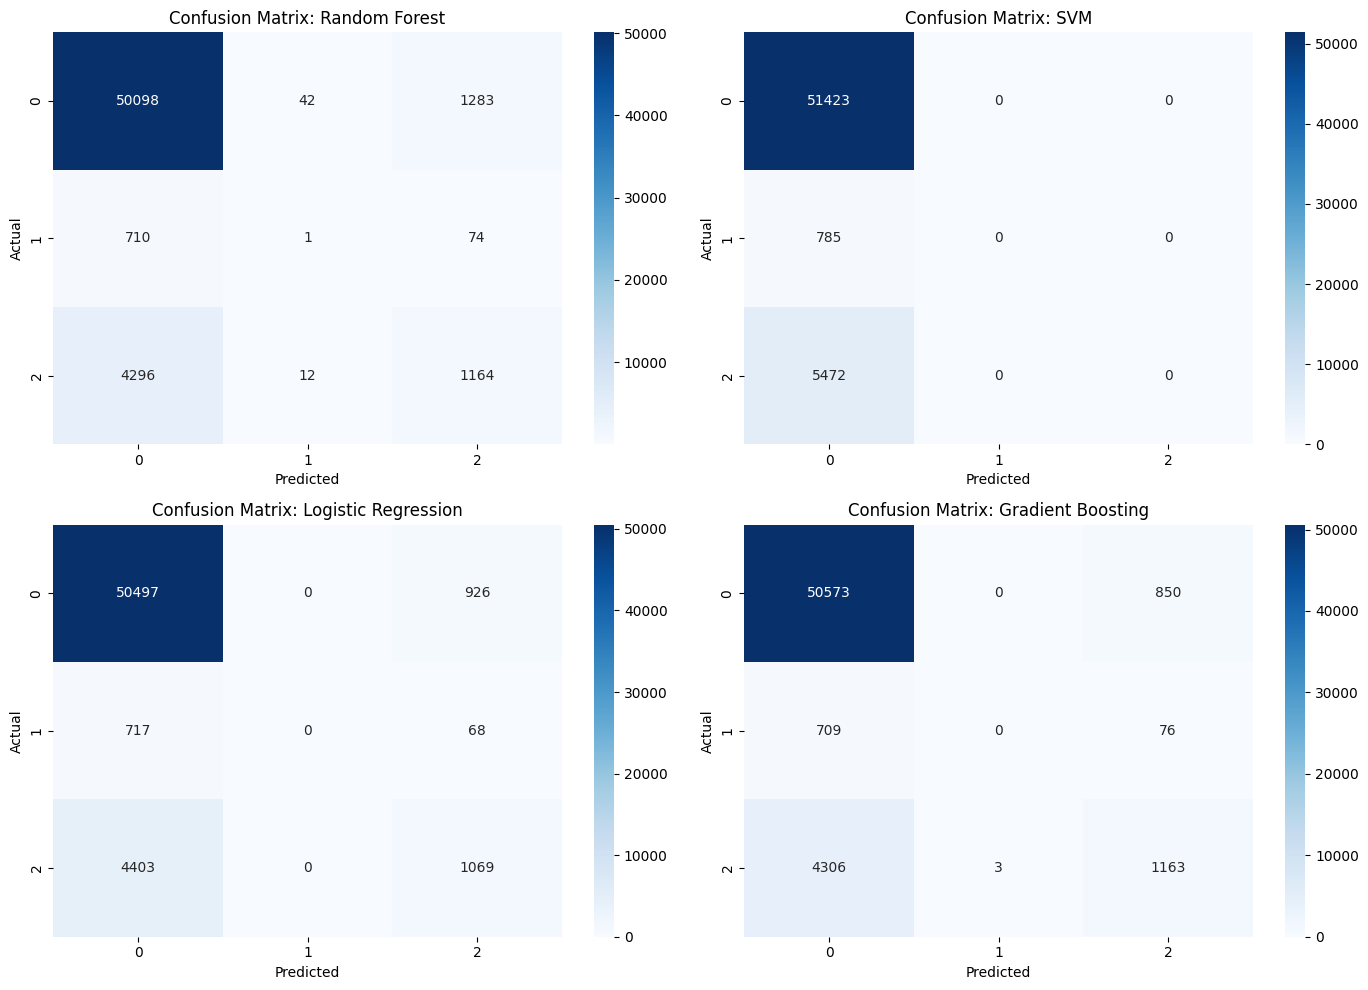

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming filtered_brfss_df_selected is your DataFrame and the target vector is 'Diabetes_Diagnosis'
# Prepare the features (X) and target (y)
X = filtered_brfss_df_selected.drop(columns=['Diabetes_Diagnosis'])
y = filtered_brfss_df_selected['Diabetes_Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion_mat

# Evaluate each model
results = {}
for model_name, model in models.items():
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('model', model)
    ])
    accuracy, report, confusion_mat = evaluate_model(pipeline, X_train, y_train, X_test, y_test)
    results[model_name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': confusion_mat
    }

# Print the evaluation results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['report'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("\n")

# Visualize confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, (model_name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix: {model_name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()
